

## TP réalisé pour l'obtention d'un Certificat en Réseau de neurone convolutif en ligne sur Udemy

L'objectif de ce TP consistait à construire un modèle de Réseau de Neurone Convolutif pour prédire de quel animal s'agit il sur une base de données contenant les images de chiens et les image de chats.

In [1]:
# Importation de bibliothèques de CNN
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import  Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
from livelossplot import PlotLossesKeras

Using TensorFlow backend.


In [2]:
# les Hyperparamètres
IMAGE_SIZE = 150
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 20
BATCH_SIZE = 32

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

construction du modele inspirée de https://towardsdatascience.com/image-classifier-cats-vs-dogs-with-convolutional-neural-networks-cnns-and-google-colabs-4e9af21ae7a8


In [3]:
# initialisation du modele
classifier = Sequential()

In [4]:
# Step 1 - construction de la première couche de  Convolution

classifier.add(Conv2D(filters=32,kernel_size=3,strides=1,border_mode='same', input_shape=input_shape,activation="relu"))
# construction de la première couche de max-pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

/Users/vw12/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=32, kernel_size=3, strides=1, input_shape=(150, 150,..., activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vw12/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 1), activation="relu", padding="same")`
  after removing the cwd from sys.path.


In [5]:
# Ajout de la seconde couche de convolution et de max-pooling
classifier.add(Conv2D(64, 3, 1, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

/Users/vw12/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 1), activation="relu")`
  
/Users/vw12/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 1), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# Ajout de la troisième  couche de convolution et de max-pooling
classifier.add(Conv2D(128, 3, 1, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

/Users/vw12/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 1), activation="relu")`
  
/Users/vw12/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 1), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# Ajout de la quatrieme couche de convolution et de max-pooling
classifier.add(Conv2D(256, 3, 1, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

/Users/vw12/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 1), activation="relu")`
  
/Users/vw12/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 1), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
# Step 3 - Flattening

classifier.add(Flatten())

classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(0.5)) # qui premet de desactiver certains neurones avec certaines proba

classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(0.5)) # qui premet de desactiver certains neurones avec certaines proba


classifier.add(Dense(units = 1, activation = 'sigmoid')) # car on a 2 classes chien et chat

In [9]:
# entrainer CNN sur les images avec le pas d'apprentissage =0.0001
classifier.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])


Pour éviter le surapprentissage car nous avons 8000 images, on va utiliser un fonction **ImageDataGenerator** dans **kers documentation** pour générer de nouvelles images afin d'entrainer de reseau et  aussi évaluer la performance de sur le jeu de test  

In [10]:
# augmentation des données
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
prediction_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
# preparation des données
training_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=BATCH_SIZE,
        class_mode="binary")

test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=BATCH_SIZE,
        class_mode="binary")

prediction_set= prediction_datagen.flow_from_directory(
        'dataset/prediction',
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=BATCH_SIZE,
        class_mode='binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 13 images belonging to 1 classes.


In [12]:
# entrainement du modèle
classifier.fit_generator(
        training_set,
        steps_per_epoch=250,
        epochs=EPOCHS,
        validation_data=test_set,
        validation_steps=63)

Epoch 1/20
250/250 [==============================] - 697s 3s/step - loss: 0.6921 - accuracy: 0.5135 - val_loss: 0.6698 - val_accuracy: 0.5270
Epoch 2/20
250/250 [==============================] - 716s 3s/step - loss: 0.6652 - accuracy: 0.5939 - val_loss: 0.6706 - val_accuracy: 0.6625
Epoch 3/20
250/250 [==============================] - 746s 3s/step - loss: 0.6175 - accuracy: 0.6561 - val_loss: 0.4969 - val_accuracy: 0.7010
Epoch 4/20
250/250 [==============================] - 741s 3s/step - loss: 0.5875 - accuracy: 0.6895 - val_loss: 0.4090 - val_accuracy: 0.7005
Epoch 5/20
250/250 [==============================] - 741s 3s/step - loss: 0.5668 - accuracy: 0.7028 - val_loss: 0.6876 - val_accuracy: 0.7400
Epoch 6/20
250/250 [==============================] - 742s 3s/step - loss: 0.5534 - accuracy: 0.7189 - val_loss: 0.6684 - val_accuracy: 0.7255
Epoch 7/20
250/250 [==============================] - 746s 3s/step - loss: 0.5391 - accuracy: 0.7326 - val_loss: 0.4096 - val_accuracy: 0.7640

La phase de la prédiction:
Dans la base single_prédiction, on 8 images de chats et 5 images de chiens 
à chaque fois on présente au modéle une image  et il nous dit si c'est un chat ou chien 

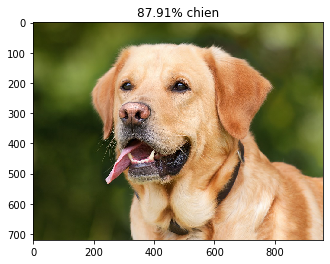

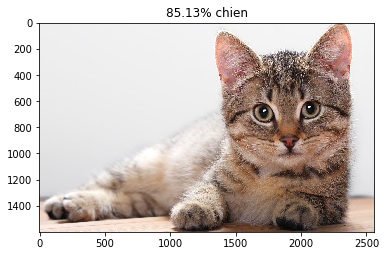

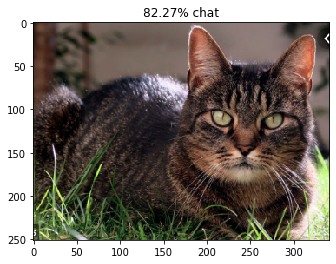

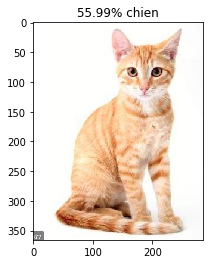

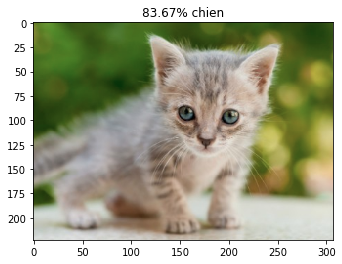

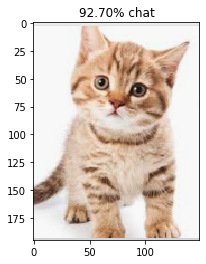

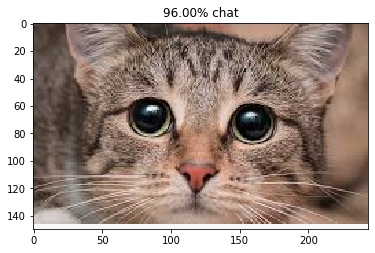

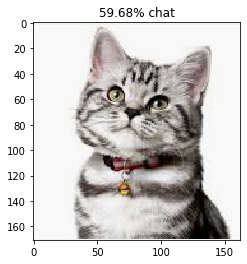

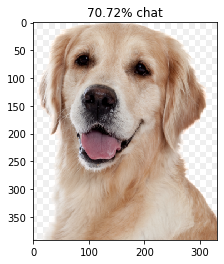

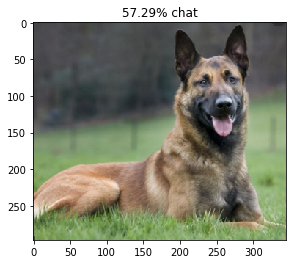

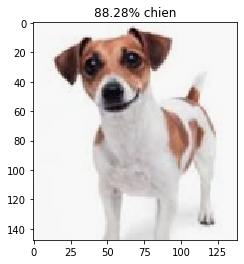

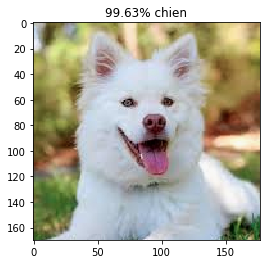

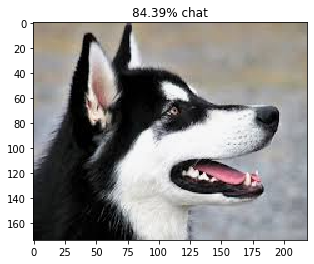

In [21]:
probabilities = classifier.predict_generator(prediction_set, len(prediction_set))
for index, probability in enumerate(probabilities):
    image_path = 'dataset/prediction' + "/" +prediction_set.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% chien")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% chat")
    plt.show()